### EDA 정리
#### 1. 날짜별: 월요일, 금요일, 토요일 사용자가 가장많으며, 일요일에 제일 적음
#### - 2020 공휴일에 사용자는 더욱 적음
#### 2. 하반기로 시간이 흐를수록 사용자가 늘어남, 신규가입자가 늘어남.
#### 3. AD1을 지역이라고 가정, 지역별 이용빈도의 격차가 큼. (강남이 1등으로 보임)
#### 4. 2019년부터 가입한 사람들이 대부분의 유저.
#### 5. 2018년12월16일 가입자가 많은데, 그 중에서 999665 혼자 366건, 모든 ad1, goods_type은 다르지만, d_type은 동일하게 CC
---------------------------------------

### 결론: 신규가입자 증가와 지역이 중요한 feature가 될 것 같음

In [48]:
## 환경 세팅 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

pd.options.display.float_format = '{:.0f}'.format

def get_font_family():
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인
    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null
        import matplotlib.font_manager as fm
        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

get_font_family()
font_family = get_font_family()
plt.rc('font', family=font_family)
plt.rc('axes', unicode_minus=False)
plt.style.use('ggplot')

In [49]:
df = pd.read_csv("실전db.csv")
df.head()

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR


In [50]:
df.describe()

,USER_ID,STORE_ID,COUNT
count,879271,879271,879271
mean,1206566,149600,1
std,420653,68898,1
min,224,4,1
25%,900576,92437,1
50%,1321440,173059,1
75%,1542416,220661,1
max,1830598,231465,61


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879271 entries, 0 to 879270
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   USER_ID     879271 non-null  int64 
 1   JOIN_DATE   879271 non-null  object
 2   D_TYPE      879271 non-null  object
 3   STORE_ID    879271 non-null  int64 
 4   GOODS_TYPE  879271 non-null  object
 5   DATE        879271 non-null  object
 6   COUNT       879271 non-null  int64 
 7   AD1         879271 non-null  object
dtypes: int64(3), object(5)
memory usage: 53.7+ MB


In [52]:
df['DATE']

0         2020-01-01
1         2020-01-01
2         2020-01-01
3         2020-01-01
4         2020-01-01
             ...    
879266    2020-12-31
879267    2020-12-31
879268    2020-12-31
879269    2020-12-31
879270    2020-12-31
Name: DATE, Length: 879271, dtype: object

In [53]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [54]:
df['요일']=df['DATE'].dt.day_name()

In [55]:
df

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,요일
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,Wednesday
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,Wednesday
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,Wednesday
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,Wednesday
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,Wednesday
...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,Thursday
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,Thursday
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,Thursday
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,Thursday


In [56]:
# 2020년 공휴일 지정
import pandas as pd
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday

class Calendar(AbstractHolidayCalendar):
    rules = [
        Holiday('New Year', month=1, day=1),
        Holiday('KR_New Year1', month=1, day=24),
        Holiday('KR_New Year2', month=1, day=25),
        Holiday('KR_New Year3', month=1, day=26),
        Holiday('3.1', month=3, day=1),
        Holiday('Buddha Day', month=4, day=30),
        Holiday('Memorial Day', month=6, day=6),
        Holiday('Liberation Day', month=8, day=15),
        Holiday('KR_Thanksgiving1', month=9, day=30),
        Holiday('KR_Thanksgiving2', month=10, day=1),
        Holiday('KR_Thanksgiving3', month=10, day=2),
        Holiday('National Foundation Day', month=10, day=3),
        Holiday('Hangul Day', month=10, day=9),
        Holiday('Christmas', month=12, day=25)
    ]
    
    
dr = pd.date_range(start='2020-01-01', end='2020-12-31')
cal = Calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())
df['Holiday'] = df['DATE'].isin(holidays)

In [57]:
df.head()

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,요일,Holiday
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,Wednesday,True
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,Wednesday,True
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,Wednesday,True
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,Wednesday,True
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,Wednesday,True


### 공휴일에는 true값 표시

In [58]:
공휴일 = df.groupby(['DATE','Holiday'])['COUNT'].sum().reset_index()
공휴일

,DATE,Holiday,COUNT
0,2020-01-01,True,935
1,2020-01-02,False,1518
2,2020-01-03,False,1758
3,2020-01-04,False,2245
4,2020-01-05,False,1531
...,...,...,...
361,2020-12-27,False,1309
362,2020-12-28,False,2797
363,2020-12-29,False,2826
364,2020-12-30,False,2919


<AxesSubplot:xlabel='DATE', ylabel='COUNT'>

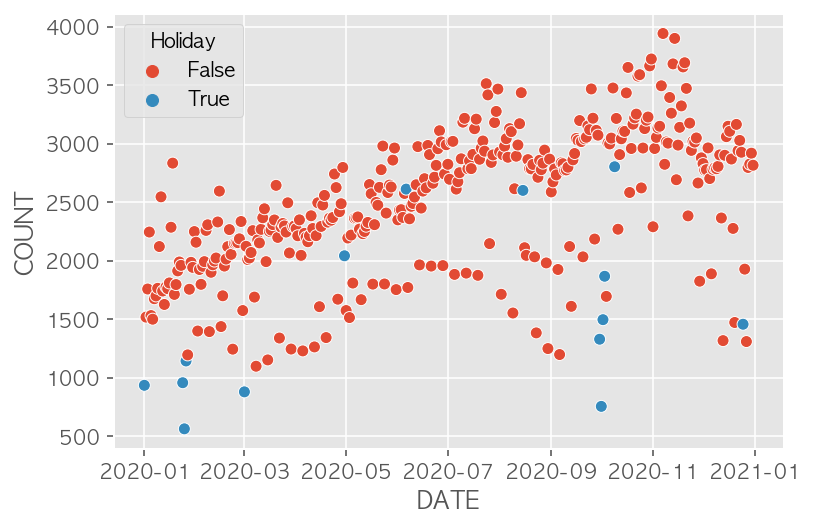

In [59]:
sns.scatterplot(data=공휴일, x='DATE', y='COUNT', hue='Holiday')

### 공휴일에는 사용량이 비교적 적은 양을 보여줌

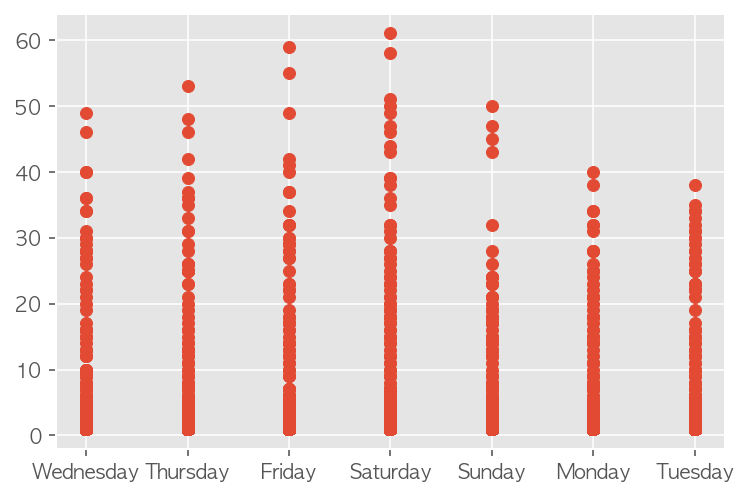

In [60]:
x= df['요일']
y= df['COUNT']
plt.scatter(x,y)

In [61]:
daily = df.groupby(['요일', 'GOODS_TYPE'])['COUNT'].sum().reset_index()
daily

,요일,GOODS_TYPE,COUNT
0,Friday,A,89083
1,Friday,B,28240
2,Friday,C,20857
3,Friday,D,3657
4,Monday,A,91607
5,Monday,B,17228
6,Monday,C,17274
7,Monday,D,4338
8,Saturday,A,102734
9,Saturday,B,6287


<AxesSubplot:xlabel='요일', ylabel='COUNT'>

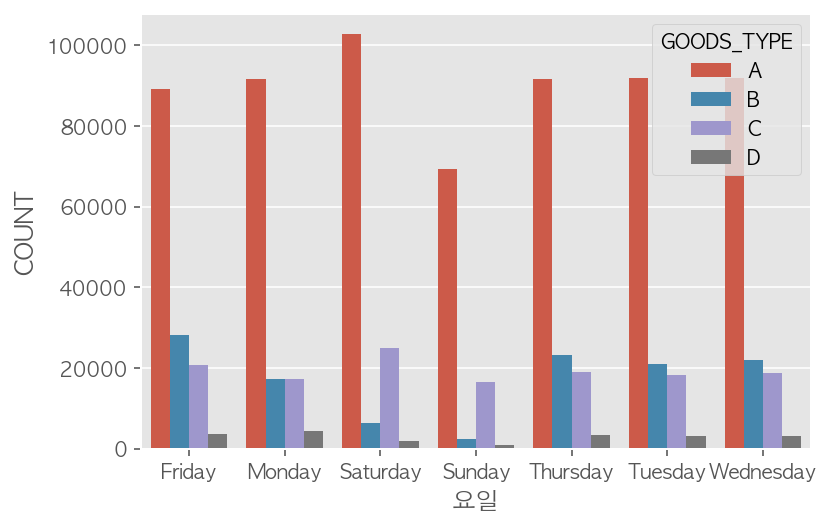

In [62]:
sns.barplot(data=daily, x='요일', y='COUNT', hue='GOODS_TYPE')

### 금요일,월요일, 토요일에 사용자가 가장 많으며, 일요일에 사용자가 제일 적다

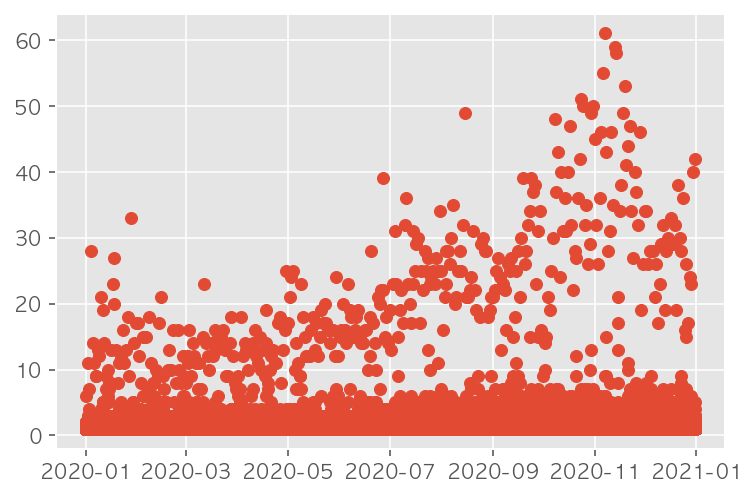

In [63]:
x= df['DATE']
y= df['COUNT']
plt.scatter(x,y)

### 하반기로 지나갈수록 사용량이 많다

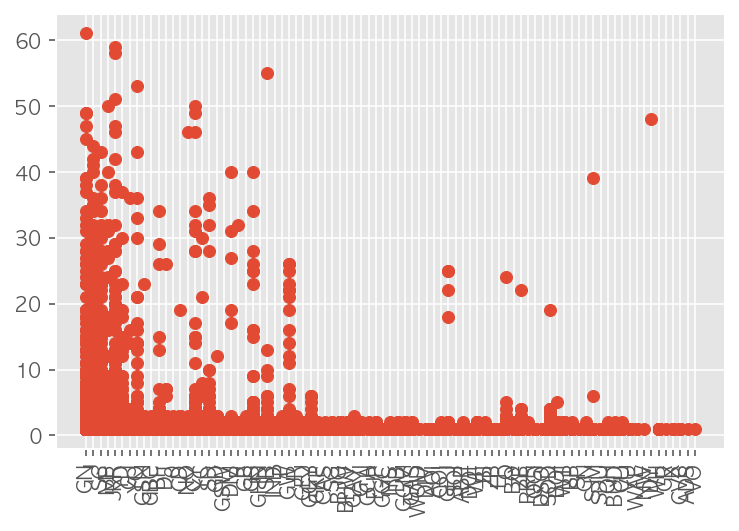

In [64]:
x= df['AD1']
y= df['COUNT']
plt.xticks(rotation='vertical')
plt.scatter(x,y)

### 지역별 이용빈도의 격차가 큰 것을 알 수 있다 (강남?이 1등으로 보임)

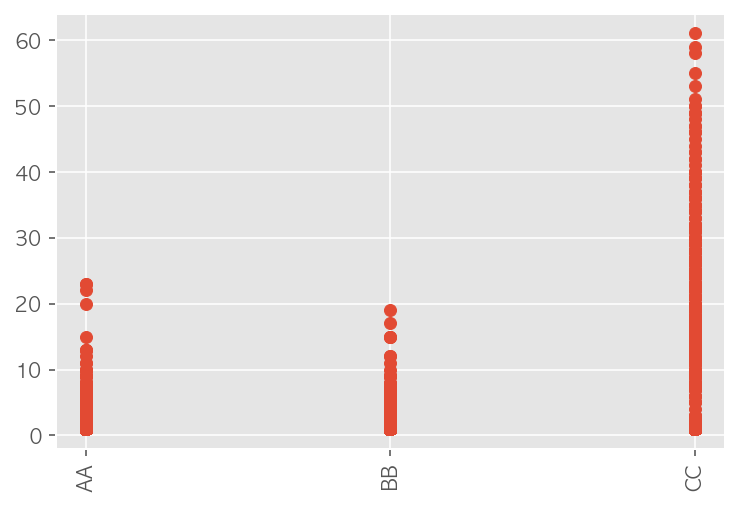

In [65]:
x= df['D_TYPE']
y= df['COUNT']
plt.xticks(rotation='vertical')
plt.scatter(x,y)

### AA: 당일권, BB: 월 정기권, CC: 시간권을 알 수 있다.

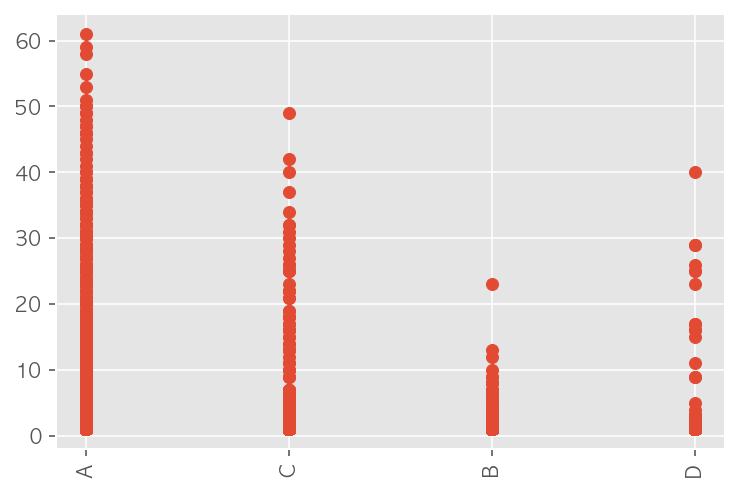

In [66]:
x= df['GOODS_TYPE']
y= df['COUNT']
plt.xticks(rotation='vertical')
plt.scatter(x,y)

### A: 제휴, B: 공영, C: 카드가능, D: 기계식제외

In [67]:
Operation = df[df['JOIN_DATE']>='2019-01-01']
len(Operation)

607076

In [68]:
len(df)

879271

### 2019년부터 가입한 사람들이 대부분, 가입년은 2019년을 기준으로 잡는게 좋아보임

In [69]:
join=df.groupby(['JOIN_DATE'])['COUNT'].sum()
join

JOIN_DATE
1970-01-01    1119
2013-12-16       2
2013-12-17      27
2013-12-18       1
2013-12-21       2
              ... 
2020-12-27     105
2020-12-28     140
2020-12-29     117
2020-12-30     108
2020-12-31      80
Name: COUNT, Length: 2352, dtype: int64

<AxesSubplot:xlabel='JOIN_DATE'>

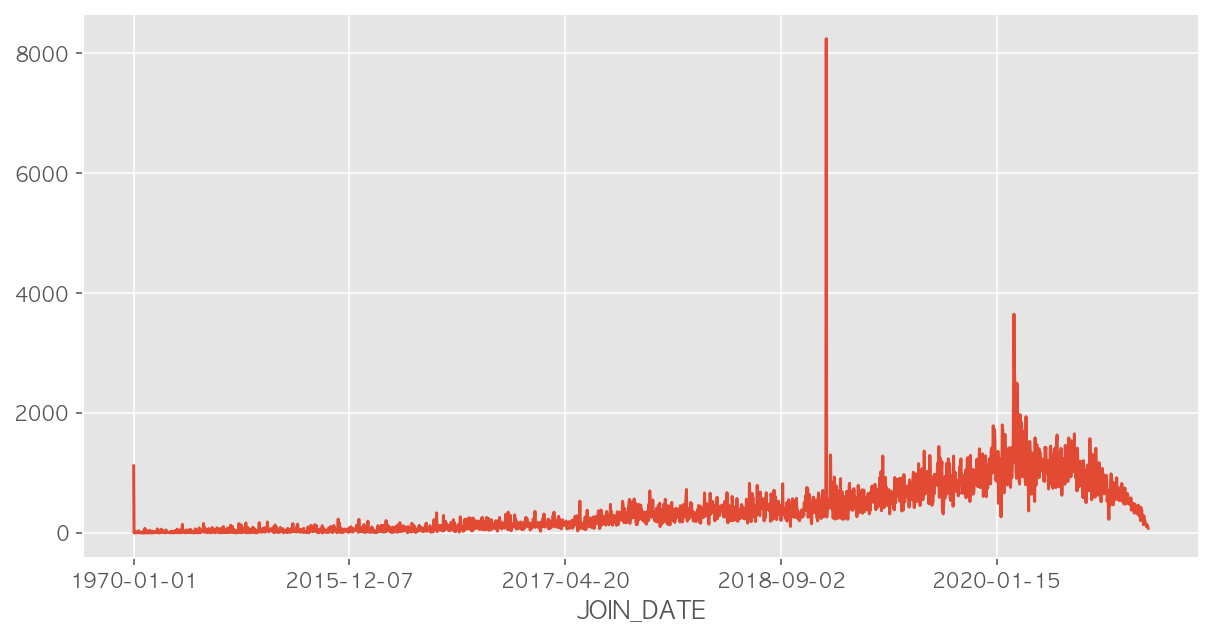

In [70]:
join.transpose().plot(figsize=(10,5))

### 가입날짜에 따른 사용량, count값이 튀는 2018년도 확인 필요

In [71]:
df.sort_values('COUNT', ascending=False)

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,요일,Holiday
729776,999665,2018-12-16,CC,96266,A,2020-11-07,61,GN,Saturday,False
748372,999665,2018-12-16,CC,109677,A,2020-11-13,59,JRR,Friday,False
751974,999665,2018-12-16,CC,1109,A,2020-11-14,58,JRR,Saturday,False
726277,999665,2018-12-16,CC,190055,A,2020-11-06,55,SB,Friday,False
767392,999665,2018-12-16,CC,131081,A,2020-11-19,53,YO,Thursday,False
...,...,...,...,...,...,...,...,...,...,...
295494,1579165,2020-05-26,AA,27996,A,2020-05-27,1,J,Wednesday,False
295495,1579168,2020-05-26,AA,104916,A,2020-05-27,1,GN,Wednesday,False
295496,1579173,2020-05-26,AA,93362,A,2020-05-27,1,CY,Wednesday,False
295497,1579174,2020-05-26,BB,221017,A,2020-05-27,1,YD,Wednesday,False


In [72]:
df[df["JOIN_DATE"]=="2018-12-16"].head(20)

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,요일,Holiday
372,999665,2018-12-16,CC,82399,A,2020-01-01,6,JRR,Wednesday,True
1525,999201,2018-12-16,AA,220655,B,2020-01-02,1,JRR,Thursday,False
1526,999399,2018-12-16,BB,91885,A,2020-01-02,1,YD,Thursday,False
1527,999665,2018-12-16,CC,104988,A,2020-01-02,11,GN,Thursday,False
3120,999573,2018-12-16,AA,220440,A,2020-01-03,1,MP,Friday,False
3121,999665,2018-12-16,CC,181832,A,2020-01-03,7,SC,Friday,False
5033,998863,2018-12-16,AA,182007,A,2020-01-04,1,J,Saturday,False
5034,999665,2018-12-16,CC,109223,A,2020-01-04,28,MP,Saturday,False
6917,998805,2018-12-16,AA,82401,A,2020-01-05,1,JRR,Sunday,False
6918,999399,2018-12-16,BB,91853,A,2020-01-05,1,YD,Sunday,False


### 2018-12-16 가입자에게 무슨 혜택이 있었는지 이 날 가입한 사람들이 굉장히 많음

In [73]:
df[df["USER_ID"]==999665]

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,요일,Holiday
372,999665,2018-12-16,CC,82399,A,2020-01-01,6,JRR,Wednesday,True
1527,999665,2018-12-16,CC,104988,A,2020-01-02,11,GN,Thursday,False
3121,999665,2018-12-16,CC,181832,A,2020-01-03,7,SC,Friday,False
5034,999665,2018-12-16,CC,109223,A,2020-01-04,28,MP,Saturday,False
6919,999665,2018-12-16,CC,104916,A,2020-01-05,14,GN,Sunday,False
...,...,...,...,...,...,...,...,...,...,...
867260,999665,2018-12-16,CC,2428,A,2020-12-27,17,CY,Sunday,False
868847,999665,2018-12-16,CC,109267,A,2020-12-28,24,J,Monday,False
871562,999665,2018-12-16,CC,90193,C,2020-12-29,23,GW,Tuesday,False
874317,999665,2018-12-16,CC,220797,D,2020-12-30,40,GS,Wednesday,False


### 제일 눈에띄는 999665